In [25]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

import nltk
plt.style.use('ggplot')



AttributeError: partially initialized module 'nltk' has no attribute 'data' (most likely due to a circular import)

In [ ]:
df = pd.read_csv('Reviews.csv')

In [ ]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [ ]:
df['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

In [ ]:
df= df.head(500)

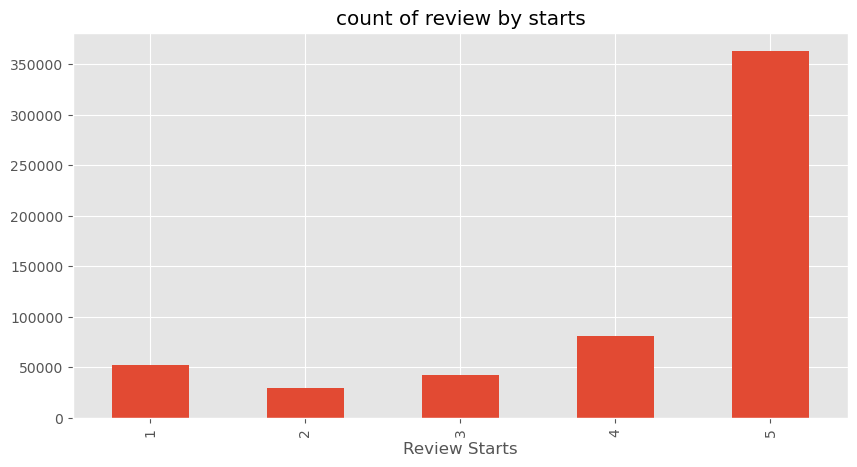

In [ ]:
#EDA

#df['Score'].value_counts()#this gives the number of times each score occurs
ax= df['Score'].value_counts().sort_index()\
    .plot(kind='bar',
    title='count of review by starts',
    figsize=(10,5))

ax.set_xlabel('Review Starts')
plt.show()

In [ ]:
#basic nltk

example= df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rijja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
tokens=nltk.word_tokenize(example)
tokens[:10]

NameError: name 'nltk' is not defined

In [ ]:

nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rijja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [ ]:
tagged= nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\rijja\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\rijja\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\rijja\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\rijja\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\rijja\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\bas

True

In [ ]:
entities=nltk.chunk.ne_chunk(tagged)#it will gorup the tokens into groups of text
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## 1- sentiment analysis using VADER
(valence aware dictionary and sentiment reasoner)  bag of words approach
1- stop words are removed
2- each word is scored and combined to a total score

it have a value of either positive, negative or neutral for each word in the sentence. it will combine all the words of a sentence and tell that how positive , negativ or neutral the statement is. this approach does not account for relationship between words


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


SentimentAnalyzerObject = SentimentIntensityAnalyzer()

AttributeError: partially initialized module 'nltk' has no attribute 'data' (most likely due to a circular import)

In [ ]:
SentimentAnalyzerObject.polarity_scores("I am so Happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [ ]:
SentimentAnalyzerObject.polarity_scores("t am very sad")

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}

In [ ]:
SentimentAnalyzerObject.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
#run the polarity score on the enitre dataset

results={}
for i, row in tqdm(df.iterrows(),total=len(df)):  #here i is the index of an element on df and  row is the content of that element
    text=row['Text']
    myid = row['Id']
    results[myid]=SentimentAnalyzerObject.polarity_scores(text)
   

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:


# Assuming you already have the 'results' dictionary with sentiment scores
vaders = pd.DataFrame(results).T  # Transpose the DataFrame to change orientation
vaders = vaders.reset_index().rename(columns={'index': 'Id'})  # Reset index and rename column to 'Id'
vaders = vaders.merge(df, on='Id', how='left')  # Merge sentiment DataFrame with original DataFrame based on 'Id'

# Now 'vaders' DataFrame contains sentiment scores and original data, merged on 'Id'


In [ ]:
vaders.head(5)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Text(0.5, 1.0, 'compound scores by amazon star review')

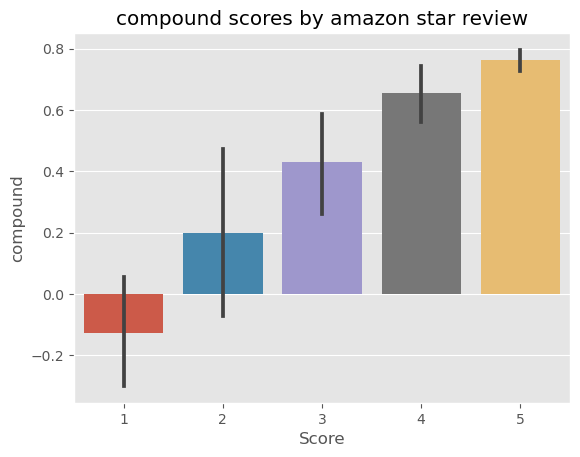

In [ ]:
ax= sns.barplot(data=vaders,x='Score',y = 'compound')
ax.set_title('compound scores by amazon star review')


Text(0.5, 1.0, 'neutral')

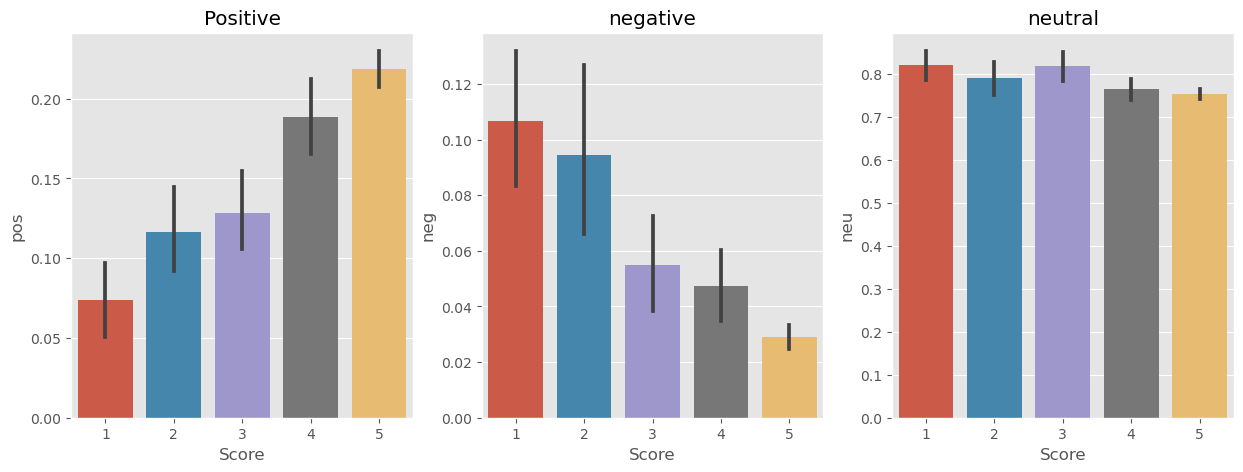

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('negative')
axs[2].set_title('neutral')

## roberta pretrained model
1- use model trained of a large corpus of data
2- transformer model accounts for teh words but also the context related to other words 

(deep learning model)
use hugging face

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
CACHE_DIR = "/path/to/cache/directory"  # Specify the directory where the model weights are cached

# Load tokenizer from cache
tokenizer = AutoTokenizer.from_pretrained(MODEL, cache_dir=CACHE_DIR)

# Load model from cache
model = AutoModelForSequenceClassification.from_pretrained(MODEL, cache_dir=CACHE_DIR)


d:\New folder\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in E:\path\to\cache\directory. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [ ]:
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [ ]:
#run for Roberta model
encodded_text=tokeizer(example,return_tensors='pt')

In [ ]:
output= model(**encodded_text)
scores= output[0][0].detach().numpy()
scores= softmax(scores)
scores
scores_dict={
    'roberta_neg':scores[0],
     'roberta_neu':scores[1],
      'roberta_pos':scores[2]

}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687453, 'roberta_pos': 0.0029573678}


In [ ]:
#now running this on entire data set

def polarity_scores_roberta(example):
    encodded_text=tokeizer(example,return_tensors='pt')
    output= model(**encodded_text)
    scores= output[0][0].detach().numpy()
    scores= softmax(scores)
    scores
    scores_dict={
        'roberta_neg':scores[0],
        'roberta_neu':scores[1],
        'roberta_pos':scores[2]

    }
    return scores_dict

In [ ]:
results={}
for i, row in tqdm(df.iterrows(),total=len(df)):  #here i is the index of an element on df and  row is the content of that element
    text=row['Text']
    myid = row['Id']
    vader_results[myid]=SentimentAnalyzerObject.polarity_scores(text)
    roberta_result = polarity_scores_roberta(text)
    break

NameError: name 'tqdm' is not defined